In [7]:
%autosave 0
from __future__ import print_function

Autosave disabled


## Example 5: Calculate 3J scalar couplings

We here calculate 3J scalar couplings for an entire trajectory
The following couplings can be calculated:

**In the sugar:**  
- H1H2. function of torsion angle H1'-C1'-C2'-H2'
- H2H3. function of torsion angle H2'-C2'-C3'-H3'
- H3H4. function of torsion angle H3'-C3'-C4'-H4'  

**In the backbone:**  
- 1H5P, 2H5P, C4Pb. Function of beta torsion angle
- 1H5H4,2H5H4. Function of gamma torsion angle
- H3P,C4Pe. Function of epsilon torsion angle  

**In the nucleobase:**  
- H1C2/4, H1C6/8. Function of chi torsion angle  

by default, all scalar couplings for all residues are calculated. 

This means that the output of the  `jcoupling` function is a n x m x 12 array, 
where  
n = # of frames  
m = # of nucleobases  
12 = total number of couplings  

rr is the list of residue names  

**ATT!**
it is important that the atom names follow the amber naming conventions. This is tricky for hydrogens. Other names may not be recognized!

In [8]:
# import barnaba
import barnaba as bb

# define trajectory and topology files
traj = "../test/data/samples.xtc"
top = "../test/data/sample1.pdb"

couplings,rr = bb.jcouplings(traj,topology=top)
print(couplings.shape)

(101, 71, 12)


# Loading ../test/data/samples.xtc 


We now print only the couplings relative to the first residue of the first frame

In [9]:
from barnaba import definitions
for e in range(1):
    stri = ""
    for k in range(1):
        for l in range(couplings.shape[2]):
            stri += "%10s " %  list(definitions.couplings_idx.keys())[l]
            stri += " %10.4f Hz\n " % couplings[e,k,l]
        stri += "\n"
stri += "\n"
print(stri)    

      H1H2      0.4028 Hz
       H2H3      4.7901 Hz
       H3H4     10.1837 Hz
       1H5P         nan Hz
       2H5P         nan Hz
       C4Pb         nan Hz
      1H5H4      8.7789 Hz
      2H5H4      0.0109 Hz
        H3P      4.1050 Hz
       C4Pe     10.7100 Hz
     H1C2/4      0.4799 Hz
     H1C6/8      2.2005 Hz
 




But we can also plot the histogram of the H1H2 couplings for all frames

Text(0.5,0,'H1H2 coupling, residue RC5_1_0 (Hz)')

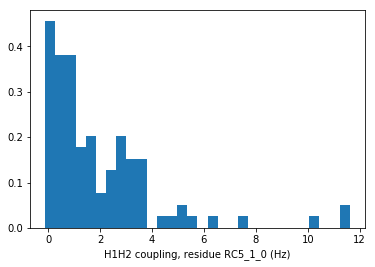

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(couplings[:,0,0],bins=30,density=True)
plt.xlabel("H1H2 coupling, residue %s (Hz)" % rr[0])

If the keyword `raw=True`, the output is the value of the torsion angle, and not the coupling.  For example
```python
angles,rr = bb.jcouplings(traj,topology=top,raw=True,residues=["RC5_1_0"])
```
returns the angles in radians for all frames of the residue RC3_1_0. As usual, the naming convention is RESNAME_RESNUMBER_CHAININDEX. Note that the shape of the array angles is n x m x 6, where  
n = # number of frames  
m = # number of residues in the list (in this specific example m=1)  
6 = number of torsion angles that are needed for the couplings calculations (H1'-H2',H2'-H3',H3'-H4',beta,gamma,epsilon,chi )




(101, 1, 7)


# Loading ../test/data/samples.xtc 


Text(0.5,0,"H1'-C1'-C2'-H2' angle, residue RC5_1_0 (rad)")

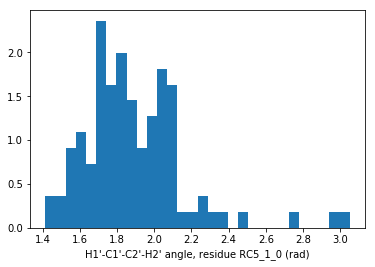

In [11]:
angles,rr = bb.jcouplings(traj,topology=top,residues=["RC5_1_0"],raw=True)
print(angles.shape)

plt.hist(angles[:,0,0],bins=30,density=True)
plt.xlabel("H1'-C1'-C2'-H2' angle, residue %s (rad)" % rr[0])

